In [245]:
import os
import sys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))

from src.lib import utils
from src.lib import centroids as centutils

In [246]:
def draw_centroids(img, centroids, ret_shape=(300, 300)):
    centroids_img = img.copy()
    for centroid in centroids:
        cv2.circle(centroids_img, tuple(centroid), 5, (0, 255, 0), -1)
    centroids_img_rsz = cv2.resize(centroids_img, ret_shape)
    return centroids_img_rsz

In [247]:
imgs_dir = '../data/raw/images'
img_name = 'NegsiRNA_A1_CA'
nuclei_img, ccj_img, seg_img, sk_img = utils.load_images(imgs_dir, img_name)
nuclei_img = utils.convert_16_gray_to_8_bgr(nuclei_img)
centroids = centutils.get_nuclei_centroids(nuclei_img)
centroids_img_rsz = draw_centroids(nuclei_img, centroids, ret_shape=(1000, 1000))

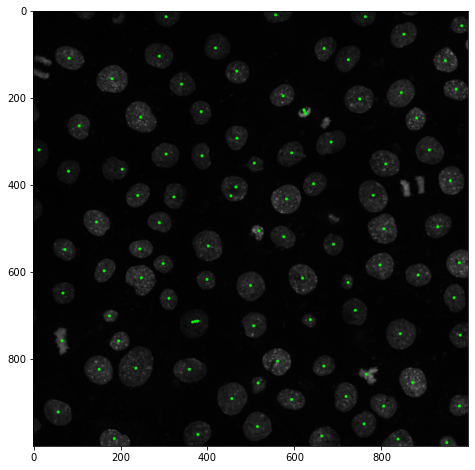

In [248]:
plt.figure(figsize=(8, 8))
plt.imshow(centroids_img_rsz)

In [249]:
centroids = {}
nuclei_imgs = {}

img_dirs = ['../data/raw/images', '../data/raw/known-not-cdh1/images', '../data/raw/ctnna-b/images']
for img_dir in img_dirs:
    print("######", img_dir)    
    for fullname in os.listdir(os.path.join(img_dir, 'CCJ')):
        if os.path.splitext(fullname)[1] != '.tif':
            continue
        img_name = fullname[:-5]
        nuclei_img, _, _, _ = utils.load_images(img_dir, img_name)
        nuclei_img = utils.convert_16_gray_to_8_bgr(nuclei_img)
        current_centroids = centutils.get_nuclei_centroids(nuclei_img)
        centroids[img_name] = current_centroids
        nuclei_imgs[img_name] = draw_centroids(nuclei_img, current_centroids)


###### ../data/raw/images
###### ../data/raw/known-not-cdh1/images
###### ../data/raw/ctnna-b/images


In [250]:
cent_lengths = {k: len(v) for k, v in sorted(centroids.items(), key=lambda item: len(item[1]))}
cent_lengths

{'GNB2L1_E1_NO': 63,
 'CTNNA1_A1_NS': 68,
 'NegsiRNA_E1_NS': 72,
 'CTNNB1_A1_NO': 74,
 'GNB2L1_E3_CA': 85,
 'NegsiRNA_L3_NS': 85,
 'CAMSAP3-2310057J16RIK_E1_NO': 86,
 'CD151_A3_NO': 89,
 'NegsiRNA_L2_NS': 90,
 'CDH2_B1_CA': 94,
 'GNB2L1_E1_NS': 95,
 'NegsiRNA_C3c_NS': 95,
 'CTNNB1_A1_NS': 96,
 'CTNNB1_A3_NO': 96,
 'NegsiRNA_A1_CA': 99,
 'GNA12_E1_NO': 99,
 'ADAM9_C3b_CA': 99,
 'ACTN1_B2_NO': 100,
 'ADD3_A1_CA': 101,
 'NegsiRNA_L2_CA': 101,
 'CTNNA1_A1_NO': 101,
 'ABL1_A1_NO': 102,
 'P2RX4_E1_NS': 104,
 'ACTN1_B1_NO': 104,
 'NegsiRNA_C3c_CA': 107,
 'P2RX4_E2_CA': 107,
 'NegsiRNA_L2_NO': 107,
 'NegsiRNA_A1_NS': 107,
 'NegsiRNA_A1_NO': 107,
 'P2RX4_E1_NO': 108,
 'ZYX_I3_NO': 108,
 'JUP_D3_NO': 110,
 'NegsiRNA_A1b_NO': 110,
 'GNA12_E1_CA': 110,
 'VCL_G2_NO': 110,
 'CTNND1_B1_NO': 110,
 'DNMBP_A3_NO': 112,
 'CTNNB1_A2_NO': 112,
 'P2RX4_E2_NO': 113,
 'ADD3_A1_NO': 113,
 'ABL1_A1_NS': 113,
 'NegsiRNA_A2_NO': 115,
 'NegsiRNA_A2b_NO': 116,
 'NegsiRNA_L3_CA': 116,
 'NegsiRNA_L3_NO': 116,
 'ACTN1

In [251]:
df_nuclei = pd.DataFrame(cent_lengths.values(), index=cent_lengths.keys(), columns=["n_nuclei"])
df_nuclei['protein'] = df_nuclei.index.str.split("_").str[0]
df_nuclei['plate'] = df_nuclei.index.str.split("_").str[1]
df_nuclei['stimuli'] = df_nuclei.index.str.split("_").str[2]

df_nuclei

,n_nuclei,protein,plate,stimuli
GNB2L1_E1_NO,63,GNB2L1,E1,NO
CTNNA1_A1_NS,68,CTNNA1,A1,NS
NegsiRNA_E1_NS,72,NegsiRNA,E1,NS
CTNNB1_A1_NO,74,CTNNB1,A1,NO
GNB2L1_E3_CA,85,GNB2L1,E3,CA
...,...,...,...,...
NegsiRNA_G1_NS,241,NegsiRNA,G1,NS
NegsiRNA_F1_CA,244,NegsiRNA,F1,CA
NegsiRNA_H2_CA,249,NegsiRNA,H2,CA
PARD3_F1_NS,257,PARD3,F1,NS


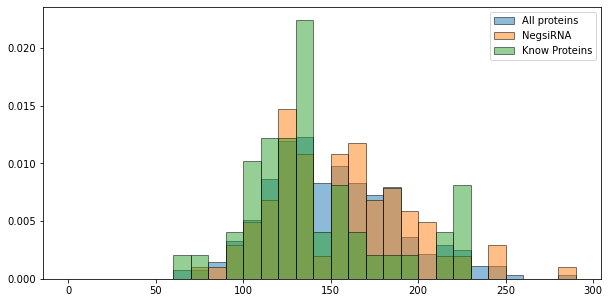

In [252]:
bins = np.arange(0, 300, 10)
known_proteins = ["ABL1", "ACTN1", "ACTN4", "CTNNA1", "CTNNB1", "CTNND1", "VASP", "VCL", "VIM", "ZYX"]

plt.figure(figsize=(10, 5))
plt.hist(df_nuclei['n_nuclei'], bins, alpha=0.5, edgecolor='k', density=True, label='All proteins')
plt.hist(df_nuclei.loc[df_nuclei['protein'] == 'NegsiRNA', 'n_nuclei'], 
         bins, alpha=0.5, edgecolor='k', density=True, label='NegsiRNA')
plt.hist(df_nuclei.loc[df_nuclei['protein'].isin(known_proteins), 'n_nuclei'], 
         bins, alpha=0.5, edgecolor='k', density=True, label='Know Proteins')

plt.legend()

,n_nuclei,protein
CTNNA1_A1_NS,68,CTNNA1
CTNNB1_A1_NO,74,CTNNB1
CTNNB1_A1_NS,96,CTNNB1
CTNNB1_A3_NO,96,CTNNB1
ACTN1_B2_NO,100,ACTN1
CTNNA1_A1_NO,101,CTNNA1
ABL1_A1_NO,102,ABL1
ACTN1_B1_NO,104,ACTN1
ZYX_I3_NO,108,ZYX
VCL_G2_NO,110,VCL


In [253]:
df_nuclei.groupby(['protein', 'stimuli']).agg(['mean', 'std'])

n_nuclei           
                       mean        std
protein stimuli                       
ABL1    NO       116.000000  19.798990
        NS       120.500000  10.606602
ACTB    CA       118.000000        NaN
        NO       131.000000        NaN
        NS       150.000000        NaN
...                     ...        ...
VCL     NS       167.666667  53.257237
VIM     NO       175.666667  46.317743
        NS       191.666667  39.551654
ZYX     NO       145.500000  53.033009
        NS       149.000000  32.526912

[111 rows x 2 columns]

In [254]:
df_nuclei['n_nuclei'].mean(), df_nuclei['n_nuclei'].std()

(150.68478260869566, 37.719518751724024)

(150.68478260869566, 37.719518751724024)

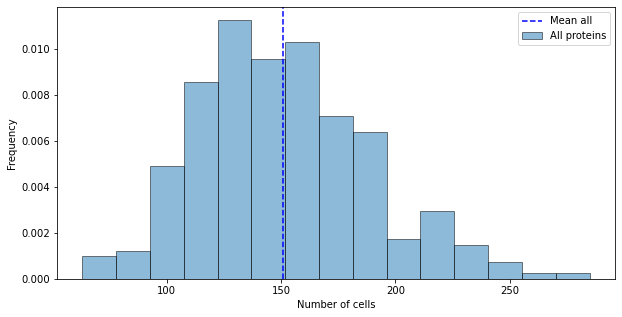

In [255]:
known_proteins = ["ABL1", "ACTN1", "ACTN4", "CTNNA1", "CTNNB1", "CTNND1", "VASP", "VCL", "VIM", "ZYX"]

mean_all = df_nuclei['n_nuclei'].mean()
std_all = df_nuclei['n_nuclei'].std()

plt.figure(figsize=(10, 5))
plt.hist(df_nuclei['n_nuclei'], 'fd', alpha=0.5, edgecolor='k', density=True, label='All proteins')
plt.axvline(x=mean_all, linestyle='--', color='blue', label='Mean all')
plt.xlabel('Number of cells')
plt.ylabel('Frequency')
plt.legend()

mean_all, std_all

(155.08823529411765, 39.2410935701052)

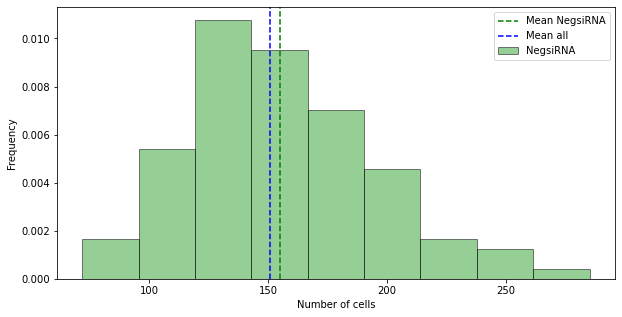

In [256]:
df_negsi = df_nuclei[df_nuclei['protein'] == 'NegsiRNA']

mean_negsi = df_negsi['n_nuclei'].mean()
std_negsi = df_negsi['n_nuclei'].std()
plt.figure(figsize=(10, 5))
plt.hist(df_negsi['n_nuclei'], 'fd', alpha=0.5, color='tab:green', edgecolor='k', density=True, label='NegsiRNA')
plt.axvline(x=mean_negsi, linestyle='--', color='green', label='Mean NegsiRNA')
plt.axvline(x=mean_all, linestyle='--', color='blue', label='Mean all')
plt.xlabel('Number of cells')
plt.ylabel('Frequency')
plt.legend()

mean_negsi, std_negsi

(140.14285714285714, 39.0986998931337)

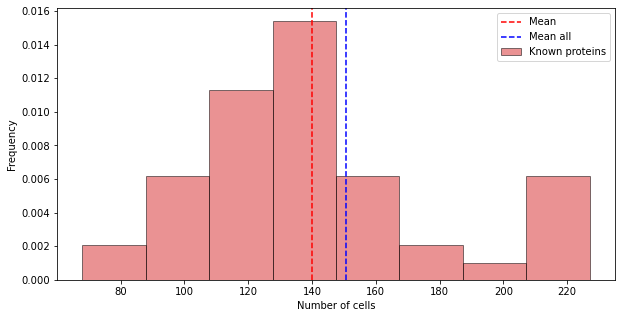

In [257]:
df_known = df_nuclei[df_nuclei['protein'].isin(known_proteins)]

mean_known = df_known['n_nuclei'].mean()
std_known = df_known['n_nuclei'].std()
plt.figure(figsize=(10, 5))
plt.hist(df_known['n_nuclei'], 'fd', alpha=0.5, color='tab:red', edgecolor='k', density=True, label='Known proteins')
plt.axvline(x=mean_known, linestyle='--', color='red', label='Mean')
plt.axvline(x=mean_all, linestyle='--', color='blue', label='Mean all')
plt.xlabel('Number of cells')
plt.ylabel('Frequency')
plt.legend()

mean_known, std_known

In [258]:
df_grouped = df_nuclei.groupby(['protein', 'stimuli']).agg(['mean', 'std', 'count'])
df_grouped

n_nuclei                 
                       mean        std count
protein stimuli                             
ABL1    NO       116.000000  19.798990     2
        NS       120.500000  10.606602     2
ACTB    CA       118.000000        NaN     1
        NO       131.000000        NaN     1
        NS       150.000000        NaN     1
...                     ...        ...   ...
VCL     NS       167.666667  53.257237     3
VIM     NO       175.666667  46.317743     3
        NS       191.666667  39.551654     3
ZYX     NO       145.500000  53.033009     2
        NS       149.000000  32.526912     2

[111 rows x 3 columns]

In [259]:
df_grouped.loc['NegsiRNA']

n_nuclei                 
               mean        std count
stimuli                             
CA       162.000000  40.515616    34
NO       150.735294  32.612796    34
NS       152.529412  43.958131    34

In [260]:
df_grouped_subset = df_grouped.loc[known_proteins + ['NegsiRNA']]
df_grouped_subset.to_csv('../results/protein_variability.csv')
df_grouped_subset

n_nuclei                 
                        mean        std count
protein  stimuli                             
ABL1     NO       116.000000  19.798990     2
         NS       120.500000  10.606602     2
ACTN1    NO       102.000000   2.828427     2
         NS       116.500000   0.707107     2
ACTN4    CA       156.000000        NaN     1
         NO       163.500000  44.547727     2
         NS       182.500000  54.447222     2
CTNNA1   NO       125.000000  20.784610     3
         NS       111.000000  37.403208     3
CTNNB1   NO        94.000000  19.078784     3
         NS       132.000000  33.406586     3
CTNND1   NO       116.500000   9.192388     2
         NS       133.000000   1.414214     2
VASP     NO       145.500000  10.606602     2
         NS       141.500000  14.849242     2
VCL      NO       152.000000  60.224580     3
         NS       167.666667  53.257237     3
VIM      NO       175.666667  46.317743     3
         NS       191.666667  39.551654     3
ZYX      NO       145.500000  53.033009     2
         NS       149.000000  32.526912     2
NegsiRNA CA       162.000000  40.515616    34
         NO       150.735294  32.612796    34
         NS       152.529412  43.958131    34

In [262]:
white_area = {}

img_dirs = ['../data/raw/images', '../data/raw/known-not-cdh1/images', '../data/raw/ctnna-b/images']
for img_dir in img_dirs:
    print("######", img_dir)    
    for fullname in os.listdir(os.path.join(img_dir, 'CCJ')):
        if os.path.splitext(fullname)[1] != '.tif':
            continue
        img_name = fullname[:-5]
        print(img_name)
        _, _, seg_img, _ = utils.load_images(img_dir, img_name)
        total_area = seg_img.shape[0] * seg_img.shape[1]
        white_area[img_name] = len(np.where(seg_img == 255)[0])

###### ../data/raw/images
NegsiRNA_C3c_CA
NegsiRNA_C3b_CA
NegsiRNA_E3_NO
AKT1_B2_NO
NegsiRNA_L2_NS
ACTB_B2_CA
JUP_D1_NO
NegsiRNA_L1_CA
FYN_E3_NS
ACTN4_L1_NO
GNA12_E1_NS
ACTN4_L3_NO
NegsiRNA_H1_CA
MYO7A_D1_CA
ACTB_B2_NS
NegsiRNA_H3_NO
GNB2L1_E3_NS
ADD3_A1_NS
NegsiRNA_A2_CA
FBLMI1_C3_NS
DNMBP_A3_NS
NegsiRNA_G3_NS
NegsiRNA_B1_NO
ADAM9_C3b_NO
PARD3_F1_NS
NegsiRNA_I1_CA
CAMSAP3-2310057J16RIK_E2_NS
ADD3_A1_CA
FYN_E2_CA
NegsiRNA_F3_NS
NegsiRNA_C2_NO
NegsiRNA_B1_CA
NegsiRNA_D1_NS
MYO6_D3_CA
NegsiRNA_H3_CA
CAMSAP3-2310057J16RIK_E2_NO
NegsiRNA_G1_NS
NegsiRNA_C2_NS
P2RX4_E1_NO
CGLN1_C2_NO
AKAP5_B2_CA
NegsiRNA_F2_NS
CDH2_B1_CA
KEAP1_E1_NS
GNA12_E3_NO
CDH2_B1_NS
NegsiRNA_I1_NO
P2RX4_E2_NO
GNA12_E3_CA
NegsiRNA_A2_NO
NegsiRNA_A2_NS
GNB2L1_E2_NO
NegsiRNA_B2_NO
NegsiRNA_A2b_NS
CAMSAP3-2310057J16RIK_E3_NS
P2RX4_E2_NS
FHOD1_D1_NO
GNB2L1_E1_NO
NegsiRNA_E3_NS
FBLMI1_C3_NO
PALLD_F3_NS
NegsiRNA_H2_NS
NegsiRNA_E1_NS
NegsiRNA_D3_NS
P2RX4_E2_CA
PALLD_F2_NO
NegsiRNA_L1_NO
NegsiRNA_B3_NO
NegsiRNA_D2_CA
NegsiRNA_F

In [263]:
ser_white = pd.Series(white_area)
df_nuclei['white_area_ratio'] = ser_white

In [264]:
df_nuclei

,n_nuclei,protein,plate,stimuli,white_area_ratio
GNB2L1_E1_NO,63,GNB2L1,E1,NO,452961
CTNNA1_A1_NS,68,CTNNA1,A1,NS,266563
NegsiRNA_E1_NS,72,NegsiRNA,E1,NS,499508
CTNNB1_A1_NO,74,CTNNB1,A1,NO,333216
GNB2L1_E3_CA,85,GNB2L1,E3,CA,477724
...,...,...,...,...,...
NegsiRNA_G1_NS,241,NegsiRNA,G1,NS,780642
NegsiRNA_F1_CA,244,NegsiRNA,F1,CA,763618
NegsiRNA_H2_CA,249,NegsiRNA,H2,CA,587556
PARD3_F1_NS,257,PARD3,F1,NS,826149


In [265]:
df_nuclei_subset = df_nuclei[df_nuclei['protein'].isin(known_proteins + ['NegsiRNA'])]

In [276]:
df_nuclei_subset = df_nuclei[df_nuclei['protein'].isin(known_proteins + ['NegsiRNA'])]
df_nuclei_subset['test'] = df_nuclei_subset['white_area_ratio'] / df_nuclei_subset['n_nuclei']
df_nuclei_subset = df_nuclei_subset.sort_values('test')

In [277]:
for index in df_nuclei_subset.index:
    print(index)

VIM_H1_NS
CTNNA1_A3_NS
NegsiRNA_L1_NS
NegsiRNA_H2_CA
VIM_H2_NS
ACTN1_B2_NS
CTNNA1_A3_NO
VIM_H2_NO
VCL_G1_NS
CTNNB1_A3_NS
CTNND1_B1_NS
ACTN4_L1_NS
ACTN1_B1_NS
NegsiRNA_B1_NS
VIM_H3_NS
NegsiRNA_L1_CA
ACTN1_B2_NO
NegsiRNA_D1_NS
NegsiRNA_F1_CA
VASP_I2_NS
VIM_H3_NO
NegsiRNA_E3_NS
NegsiRNA_G1_NS
CTNND1_B1_NO
NegsiRNA_B3_NS
NegsiRNA_I2_CA
NegsiRNA_C3c_CA
CTNNA1_A2_NO
NegsiRNA_I1_NS
NegsiRNA_A2_NS
NegsiRNA_L1_NO
VIM_H1_NO
NegsiRNA_F1_NS
NegsiRNA_C2_CA
NegsiRNA_H3_CA
NegsiRNA_C3b_NO
NegsiRNA_D2_NS
NegsiRNA_H1_NS
NegsiRNA_A2b_NS
ACTN1_B1_NO
NegsiRNA_A3_CA
VCL_G1_NO
NegsiRNA_F1_NO
CTNNB1_A2_NS
NegsiRNA_B3_CA
NegsiRNA_C3c_NO
VASP_I2_NO
ABL1_A1_NO
NegsiRNA_C1_NS
NegsiRNA_C3_NS
NegsiRNA_A1b_NS
NegsiRNA_D1_CA
ABL1_A2_NS
VCL_G3_NS
NegsiRNA_C1_CA
ACTN4_L1_NO
NegsiRNA_H2_NO
NegsiRNA_H2_NS
NegsiRNA_C3b_CA
CTNNA1_A1_NS
NegsiRNA_A3_NS
NegsiRNA_G1_CA
NegsiRNA_A2b_CA
CTNNA1_A2_NS
NegsiRNA_H1_CA
ABL1_A1_NS
NegsiRNA_L3_CA
CTNNB1_A2_NO
CTNNB1_A3_NO
ACTN4_L1_CA
CTNNA1_A1_NO
NegsiRNA_C3_NO
ACTN4_L3_NS
NegsiRNA_C3

Text(0, 0.5, 'White area ratio')

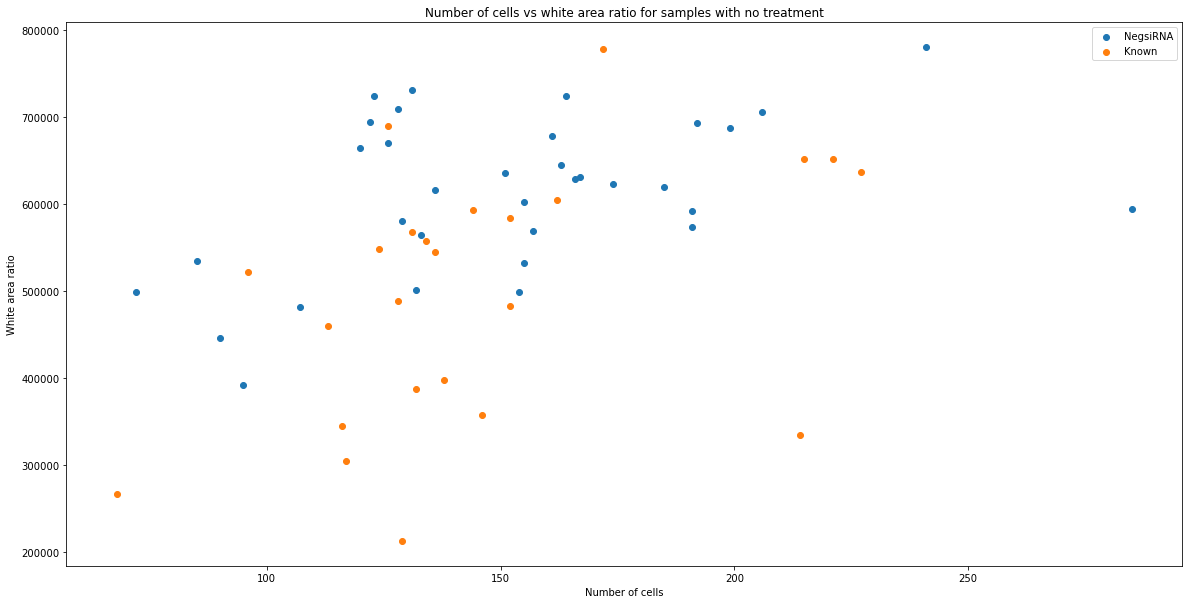

In [278]:
plt.figure(figsize=(20, 10))
df_nuclei_subset_ns = df_nuclei_subset[df_nuclei_subset['stimuli'] == 'NS'] 
df_nuclei_subset_ns_negsi = df_nuclei_subset_ns[df_nuclei_subset_ns['protein'] == 'NegsiRNA']
df_nuclei_subset_ns_known = df_nuclei_subset_ns[df_nuclei_subset_ns['protein'] != 'NegsiRNA']
plt.scatter(df_nuclei_subset_ns_negsi['n_nuclei'], df_nuclei_subset_ns_negsi['white_area_ratio'], label='NegsiRNA')
plt.scatter(df_nuclei_subset_ns_known['n_nuclei'], df_nuclei_subset_ns_known['white_area_ratio'], label='Known')

plt.legend()
plt.legend()
plt.title('Number of cells vs white area ratio for samples with no treatment')
plt.xlabel('Number of cells')
plt.ylabel('White area ratio')

Text(0, 0.5, 'White area ratio')

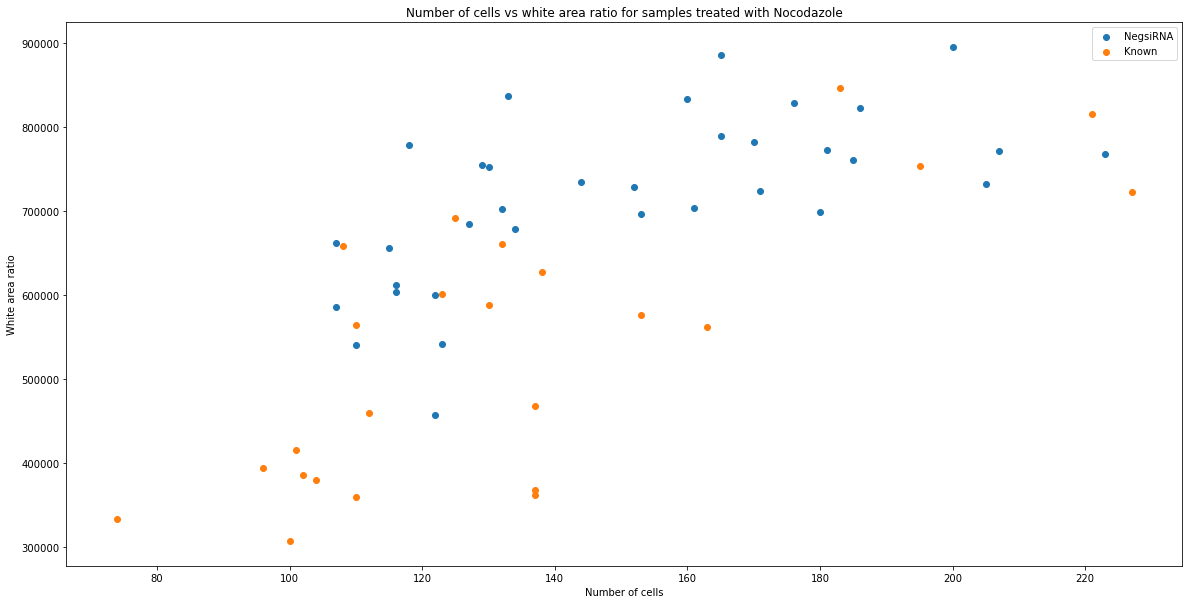

In [279]:
plt.figure(figsize=(20, 10))
df_nuclei_subset_no = df_nuclei_subset[df_nuclei_subset['stimuli'] == 'NO'] 
df_nuclei_subset_no_negsi = df_nuclei_subset_no[df_nuclei_subset_no['protein'] == 'NegsiRNA']
df_nuclei_subset_no_known = df_nuclei_subset_no[df_nuclei_subset_no['protein'] != 'NegsiRNA']
plt.scatter(df_nuclei_subset_no_negsi['n_nuclei'], df_nuclei_subset_no_negsi['white_area_ratio'], label='NegsiRNA')
plt.scatter(df_nuclei_subset_no_known['n_nuclei'], df_nuclei_subset_no_known['white_area_ratio'], label='Known')

plt.legend()
plt.title('Number of cells vs white area ratio for samples treated with Nocodazole')
plt.xlabel('Number of cells')
plt.ylabel('White area ratio')

In [280]:
df_nuclei_subset['test'] = df_nuclei_subset['white_area_ratio'] / df_nuclei_subset['n_nuclei']
df_nuclei_subset.sort_values('test')

,n_nuclei,protein,plate,stimuli,white_area_ratio,test
VIM_H1_NS,214,VIM,H1,NS,334514,1563.149533
CTNNA1_A3_NS,129,CTNNA1,A3,NS,212835,1649.883721
NegsiRNA_L1_NS,285,NegsiRNA,L1,NS,594155,2084.754386
NegsiRNA_H2_CA,249,NegsiRNA,H2,CA,587556,2359.662651
VIM_H2_NS,146,VIM,H2,NS,358008,2452.109589
...,...,...,...,...,...,...
NegsiRNA_A1_NO,107,NegsiRNA,A1,NO,662130,6188.130841
NegsiRNA_I1_NO,133,NegsiRNA,I1,NO,837004,6293.263158
NegsiRNA_L3_NS,85,NegsiRNA,L3,NS,535066,6294.894118
NegsiRNA_B2_NO,118,NegsiRNA,B2,NO,778003,6593.245763


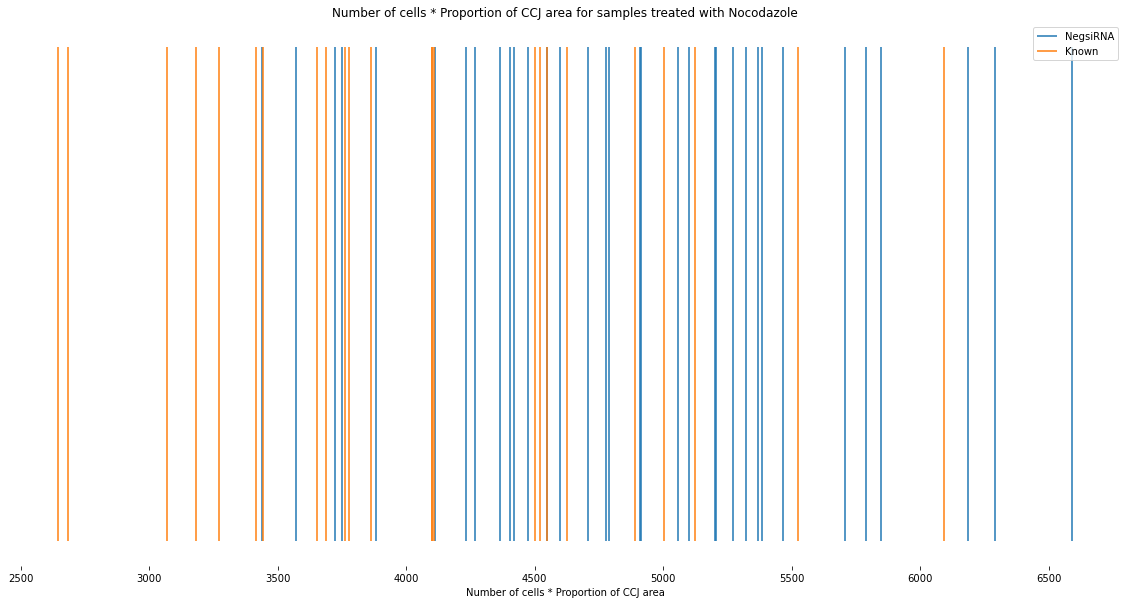

In [284]:
plt.figure(figsize=(20, 10))
#plt.hlines(y=1, xmin=0, xmax=31, color='k')
plt.eventplot(df_nuclei_subset_no_negsi['test'], label='NegsiRNA', color='tab:blue', linelengths=1)
plt.eventplot(df_nuclei_subset_no_known['test'], label='Known', color='tab:orange', linelengths=1)
plt.xlabel('Number of cells * Proportion of CCJ area')
plt.title('Number of cells * Proportion of CCJ area for samples treated with Nocodazole')
plt.ylim(0.45, 1.55)
plt.yticks([])
plt.box(False)
plt.legend()

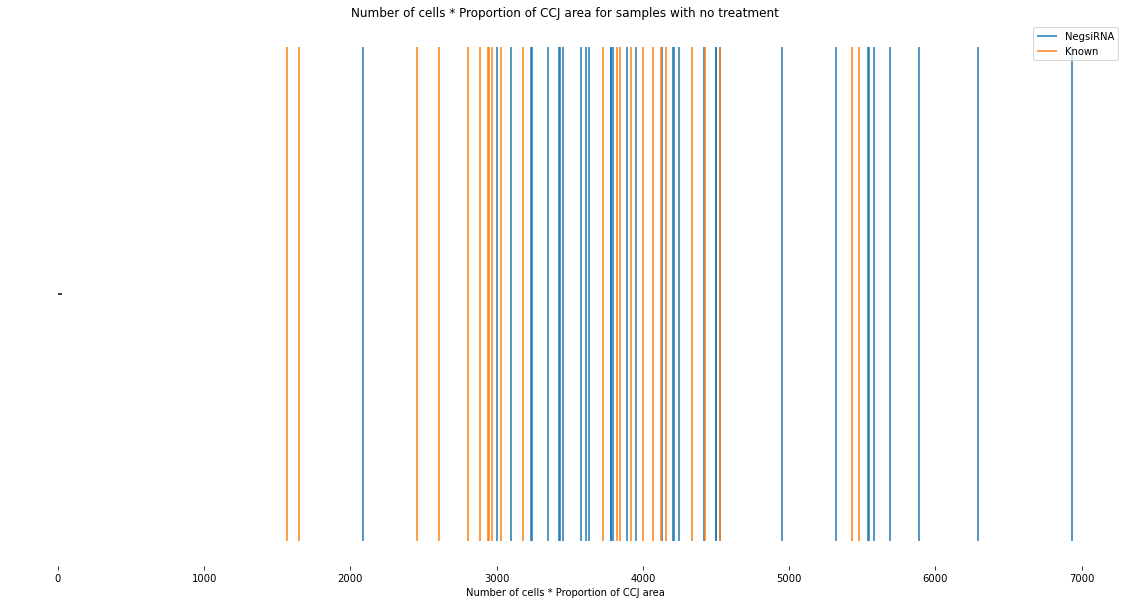

In [283]:
plt.figure(figsize=(20, 10))
plt.hlines(y=1, xmin=0, xmax=31, color='k')
plt.eventplot(df_nuclei_subset_ns_negsi['test'], label='NegsiRNA', color='tab:blue', linelengths=1)
plt.eventplot(df_nuclei_subset_ns_known['test'], label='Known', color='tab:orange', linelengths=1)
plt.xlabel('Number of cells * Proportion of CCJ area')
plt.title('Number of cells * Proportion of CCJ area for samples with no treatment')
plt.ylim(0.45, 1.55)
plt.yticks([])
plt.box(False)
plt.legend()



In [285]:
df_nuclei_subset_ns_negsi

,n_nuclei,protein,plate,stimuli,white_area_ratio,test
NegsiRNA_L1_NS,285,NegsiRNA,L1,NS,594155,2084.754386
NegsiRNA_B1_NS,191,NegsiRNA,B1,NS,573963,3005.041885
NegsiRNA_D1_NS,191,NegsiRNA,D1,NS,591687,3097.837696
NegsiRNA_E3_NS,154,NegsiRNA,E3,NS,498685,3238.214286
NegsiRNA_G1_NS,241,NegsiRNA,G1,NS,780642,3239.178423
NegsiRNA_B3_NS,185,NegsiRNA,B3,NS,619639,3349.400000
NegsiRNA_I1_NS,206,NegsiRNA,I1,NS,705552,3425.009709
NegsiRNA_A2_NS,155,NegsiRNA,A2,NS,532045,3432.548387
NegsiRNA_F1_NS,199,NegsiRNA,F1,NS,686937,3451.944724
NegsiRNA_D2_NS,174,NegsiRNA,D2,NS,622589,3578.097701


In [288]:
df_nuclei_subset_no_known['white_area_ratio'] / df_nuclei_subset_no_known['n_nuclei']

CTNNA1_A3_NO    2644.248175
VIM_H2_NO       2684.525547
ACTN1_B2_NO     3069.140000
VIM_H3_NO       3183.149780
CTNND1_B1_NO    3271.827273
CTNNA1_A2_NO    3414.306569
VIM_H1_NO       3443.361963
ACTN1_B1_NO     3651.788462
VCL_G1_NO       3685.886878
VASP_I2_NO      3761.058824
ABL1_A1_NO      3777.362745
ACTN4_L1_NO     3861.548718
CTNNB1_A2_NO    4099.633929
CTNNB1_A3_NO    4100.802083
CTNNA1_A1_NO    4107.663366
CTNNB1_A1_NO    4502.918919
ABL1_A2_NO      4521.153846
VASP_I3_NO      4546.065217
ZYX_I2_NO       4623.836066
CTNND1_B2_NO    4890.000000
ACTN4_L3_NO     5005.196970
VCL_G2_NO       5122.854545
VCL_G3_NO       5526.232000
ZYX_I3_NO       6093.120370
dtype: float64